# Varying with $N^2$ #

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import sys
from scipy.stats import linregress
from scipy.optimize import curve_fit
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from HB_Plot import nf, fmt
import layers_calc_numba
import APE_Calc as AC
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [ ]:
# Some parameters
tau = ['Vary_N/50m', 'Vary_N/250m', 'Vary_N/500m','Vary_N/750m','Vary_N/1000m',
       'Vary_N/2000m', 'Vary_N/3000m', 'Vary_N/10000m', 'Vary_N/16CDT' , 'Vary_N/4CDT',
       '3daynokpp', '30daynokpp',  '300daynokpp',  '3000daynokpp', '30000daynokpp',
       '10daynokpp', '100daynokpp', '1000daynokpp', '10000daynokpp', 'Closeddaynokpp'   ]
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ', 'f) ', 'g) ', 'h) ', 'j) ']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs = np.array(runs)

Calculate $ N^2 $ and domain integrated $\Psi$ for **all** experiments (20)

In [282]:
# Loop through runs
ROC = []
N2t = []
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    # Layers package variables
    Psi = c.get_psi_iso_z()/10**6

    # Make list of ROC / ROC0
    if i == 0:
        ROC0 = np.sum(abs(Psi))
    ROC.append((np.sum(abs(Psi))-ROC0)/ROC0)
    N2 = c.get_N2()
    if i == 0:
        N20 = np.sum(abs(N2*CellVol))/(3000*c.Ly)
    N2t.append(((np.sum(abs(N2*CellVol)))/(3000*c.Ly)-N20)/N20)

(array([-100.,  -80.,  -60.,  -40.,  -20.,    0.]),
 <a list of 6 Text yticklabel objects>)

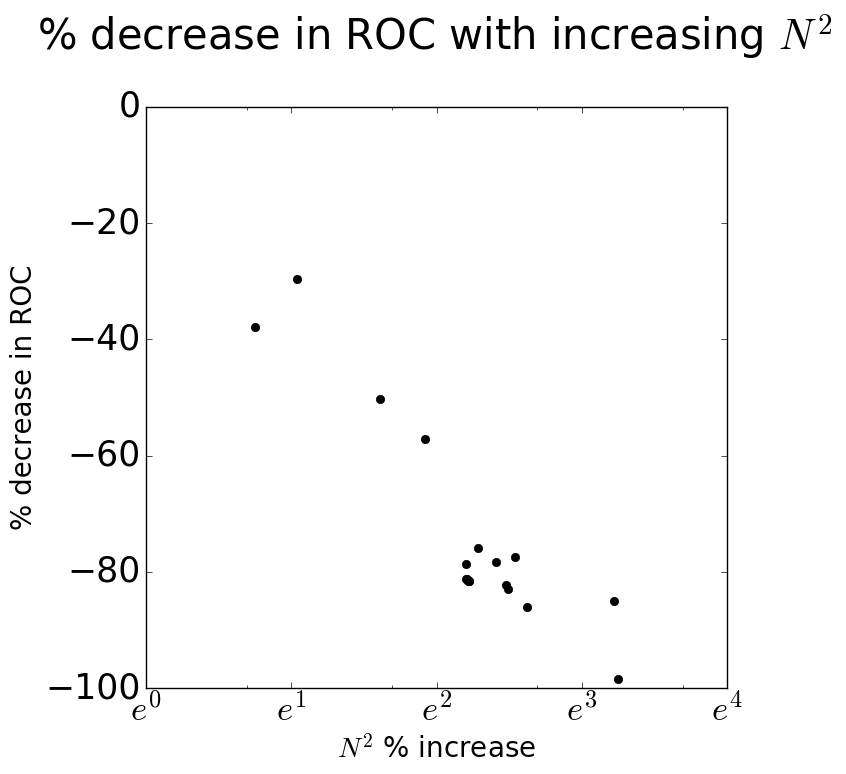

In [283]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(np.array(N2t)*100, np.array(ROC)*100,'ko', linewidth=2)
plt.xscale('log', basex=np.e)
plt.xlabel('$N^2$ % increase', fontsize=20)
plt.ylabel('% decrease in ROC', fontsize=20)
plt.title("% decrease in ROC with increasing $N^2$ \n",fontsize=30)
def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))
#plt.xticks(mtick.FuncFormatter(ticks),fontsize=25)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

## Linear Regression ##


/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


('m = ', -29.564030336464668, 'c = ', -9.4475831171646476, 'R = ', -0.95816181359289332, 'P = ', 1.2743730598175596e-05, 'ste =', 3.1224141112047112)


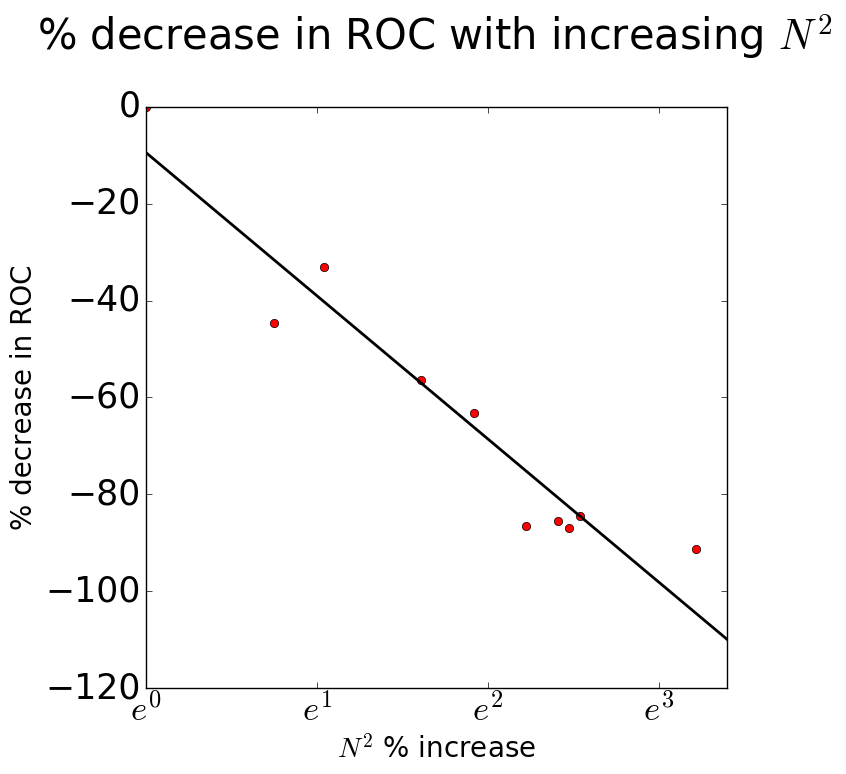

In [279]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
X = np.log(np.array(N2t)*100)

X[0] = 0#np.e **0
ax.plot(X, np.array(ROC)*100,'ro', linewidth=2)
#plt.xscale('log', basex=np.e)
plt.xlabel('$N^2$ % increase', fontsize=20)
plt.ylabel('% decrease in ROC', fontsize=20)
plt.title("% decrease in ROC with increasing $N^2$ \n",fontsize=30)

plt.xticks(np.arange(0,4,1),fontsize=25)
plt.yticks(fontsize=25)
a =ax.get_xticks().tolist()
a = ['$e^0$','$e^1$','$e^2$','$e^3$','$e^4$']
ax.set_xticklabels(labels)
m, c, r, p, ste = linregress(X ,np.array(ROC)*100) 
Y = m*np.arange(0,3.5,.1)+c
q = plt.plot(np.arange(0,3.5,.1), Y,'k', linewidth=2)
#plt.xscale('linear')
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)

In [141]:
X = np.log(np.array(N2t)*100)
X[0] = 0#np.e **0
m, c, r, p, ste = linregress(X ,np.array(ROC)*100) 
Y = m*X+c
chi_squared_stat = (((Y-np.array(ROC)*100)**2)/Y).sum()
print('Chi Squared:', chi_squared_stat)
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 19)   # Df = number of variable categories - 1
print("Critical value = ", crit)
p_value = 1 - stats.chi2.cdf(x=-chi_squared_stat,  # Find the p-value
                             df=19)
print("P value = ", p_value)
print stats.chisquare(f_obs= -np.array(ROC)*100,f_exp= -Y) 

('Chi Squared:', -22.481445267030914)
('Critical value = ', 30.143527205646159)
('P value = ', 0.26095447668843352)
Power_divergenceResult(statistic=22.481445267030914, pvalue=0.21130988472207227)


/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


For just experiments directly altering stratification 

In [150]:
# Some parameters
tau = ['Vary_N/50m', 'Vary_N/250m', 'Vary_N/500m','Vary_N/750m','Vary_N/1000m',
       'Vary_N/2000m', 'Vary_N/3000m', 'Vary_N/10000m', 'Vary_N/16CDT' , 'Vary_N/4CDT' ]
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ', 'f) ', 'g) ', 'h) ', 'j) ']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/PSI.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs = np.array(runs)
# Loop through runs
ROC = []
N2t = []
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    # Layers package variables
    Psi = c.get_psi_iso_z()/10**6

    # Make list of ROC / ROC0
    if i == 0:
        ROC0 = np.sum(abs(Psi))
    ROC.append((np.sum(abs(Psi))-ROC0)/ROC0)
    N2 = c.get_N2()
    if i == 0:
        N20 = np.sum(abs(N2*CellVol))/(3000*c.Ly)
    N2t.append(((np.sum(abs(N2*CellVol)))/(3000*c.Ly)-N20)/N20)

/noc/users/hb1g13/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


('m = ', -28.120516929715748, 'c = ', -6.7884670951573582, 'R = ', -0.96177415314534875, 'P = ', 8.9195761950489867e-06, 'ste =', 2.8307940019619453)


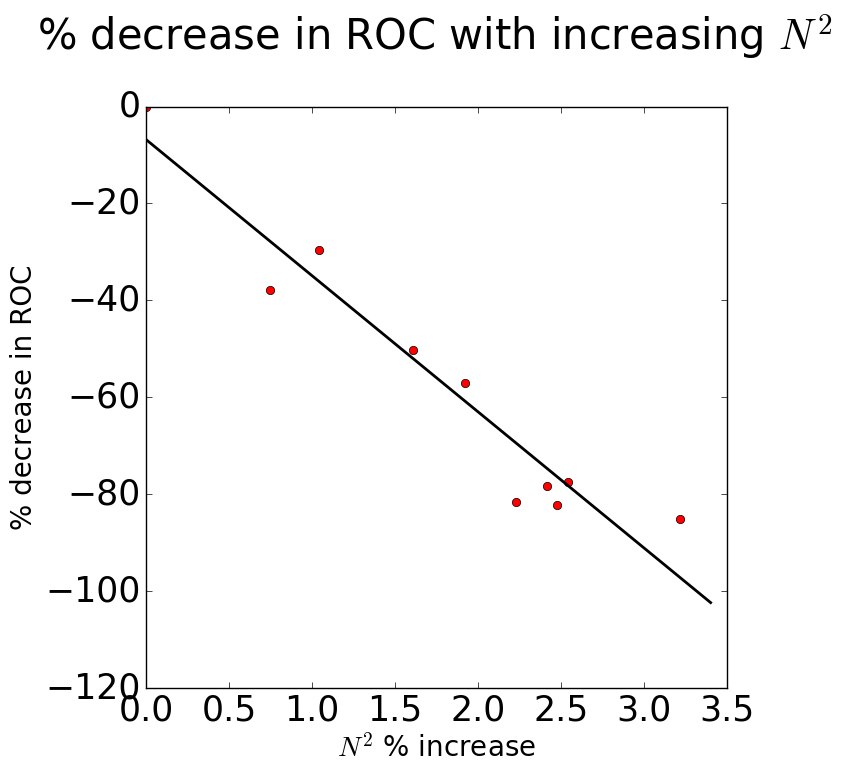

In [109]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
X = np.log(np.array(N2t)*100)
X[0] = 0#np.e **0
ax.plot(X, np.array(ROC)*100,'ro', linewidth=2)
#plt.xscale('log', basex=np.e)
plt.xlabel('$N^2$ % increase', fontsize=20)
plt.ylabel('% decrease in ROC', fontsize=20)
plt.title("% decrease in ROC with increasing $N^2$ \n",fontsize=30)
def ticks(y, pos):
    return r'$e^{:.0f}$'.format(np.log(y))
#plt.xticks(mtick.FuncFormatter(ticks),fontsize=25)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(ticks))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

m, c, r, p, ste = linregress(X ,np.array(ROC)*100) 
Y = m*np.arange(0,3.5,.1)+c
q = plt.plot(np.arange(0,3.5,.1), Y,'k', linewidth=2)
plt.xscale('linear')
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)

In [328]:
c.yc[-25]/1000

1877.5

In [333]:
# Some parameters
tau = ['Vary_N/50m', 'Vary_N/250m', 'Vary_N/500m','Vary_N/750m','Vary_N/1000m',
       'Vary_N/2000m', 'Vary_N/3000m', 'Vary_N/10000m', 'Vary_N/16CDT' , 'Vary_N/4CDT' ]
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ', 'f) ', 'g) ', 'h) ', 'j) ']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/VSQ.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs = np.array(runs)
# Loop through runs
ROCt = []
N2t = []
EKEt = []
APEt = []
APEdt = []
APEst = []
APEnt = []
Dsum = []
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    CellVol = c.rac*np.tile(c.dzf,(c.Nx,c.Ny,1)).T
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)

    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
 
    g = layers_calc_numba.LayersComputer(c)
    # ROC 
    psiz = c.get_psi_iso_z()
    dPz = c.ddz_cgrid_centered(psiz*Ty.mean(axis=2)/5000)
    dPy = c.ddy_cgrid_centered(psiz*Tz.mean(axis=2)/5000)
    ROC = np.sum((dPz+dPy),axis=0)/np.sum(CellVol.mean(axis=2)/5000)
    
    # Diabatic eddis from new def
    dx = 5000
    nx = 200
    Dz = (dx*((WT[1::, :, :]-WT[0:-1, :, :])*CellVol).mean(axis=2)/nx -
             c.ddz_cgrid_centered(psiz*Ty.mean(axis=2)/5000))
    Dy = (dx*((VT[:, 1::, :]-VT[:, 0:-1, :])*CellVol).mean(axis=2)/nx -
             c.ddy_cgrid_centered(psiz*Tz.mean(axis=2)/5000))
    D = np.sum((abs(Dz+Dy)), axis=0)/np.sum(CellVol.mean(axis=2))
    
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    # Layers package variables
    Psi = c.get_psi_iso_z()/10**6
    EKE = c.calc_EKE()*CellVol
    g = AC.APEcomputer(c)
    APE = g.calc_APE_3d().mean(axis=2)
    APEpos = APE
    APEneg[APEpos<0] = np.nan
    APED = (np.nanmean((APEpos[28::,:])))
    APEN = (np.nanmean((APEpos[0:28,-150::])))
    APEneg = APE
    APEneg[APEneg>0] = np.nan
    APES = np.nanmean(APEneg[12:25,0:50]) #(np.sum(((APEneg[12:28,0:150]))))
    # Make list of ROC / ROC0
    if i == 0:
        ROC0 = np.sum(abs(Psi))
        EKE0 = np.sum(abs(EKE))/(3000*c.Ly)
        APE0 = np.sum(abs(APE.mean(axis=1)))
        APES0 =  abs(APES)
        APEN0 =  APEN
        APED0 =  APED
        D0 = np.sum(abs(D))
    ROCt.append((np.sum(abs(Psi))-ROC0)/ROC0)
    EKEt.append(((np.sum(abs(EKE)))/(3000*c.Ly)-EKE0)/EKE0)
    APEt.append((np.sum(abs(APE.mean(axis=1)))-APE0)/APE0)
    APEst.append((abs(APES)-abs(APES0))/APES0)
    APEnt.append((APEN-APEN0)/APEN0)
    APEdt.append((APED-APED0)/APED0)
    Dsum.append((np.sum(abs(D))-D0)/D0)
    N2 = c.get_N2()
    if i == 0:
        N20 = np.sum(abs(N2*CellVol))/(3000*c.Ly)
    N2t.append(((np.sum(abs(N2*CellVol)))/(3000*c.Ly)-N20)/N20)
Dsum = np.array(Dsum)
EKEt = np.array(EKEt)
N2 = np.array(N2)
APEt = np.array(APEt)
APEst = np.array(APEst)
APEnt = np.array(APEnt)
APEdt = np.array(APEct)
ROC = np.array(ROC)

('m = ', 18.619500784299891, 'c = ', -7.3378744881904652, 'R = ', 0.98747564820033273, 'P = ', 1.0603688323555809e-07, 'ste =', 1.0517806627016104)


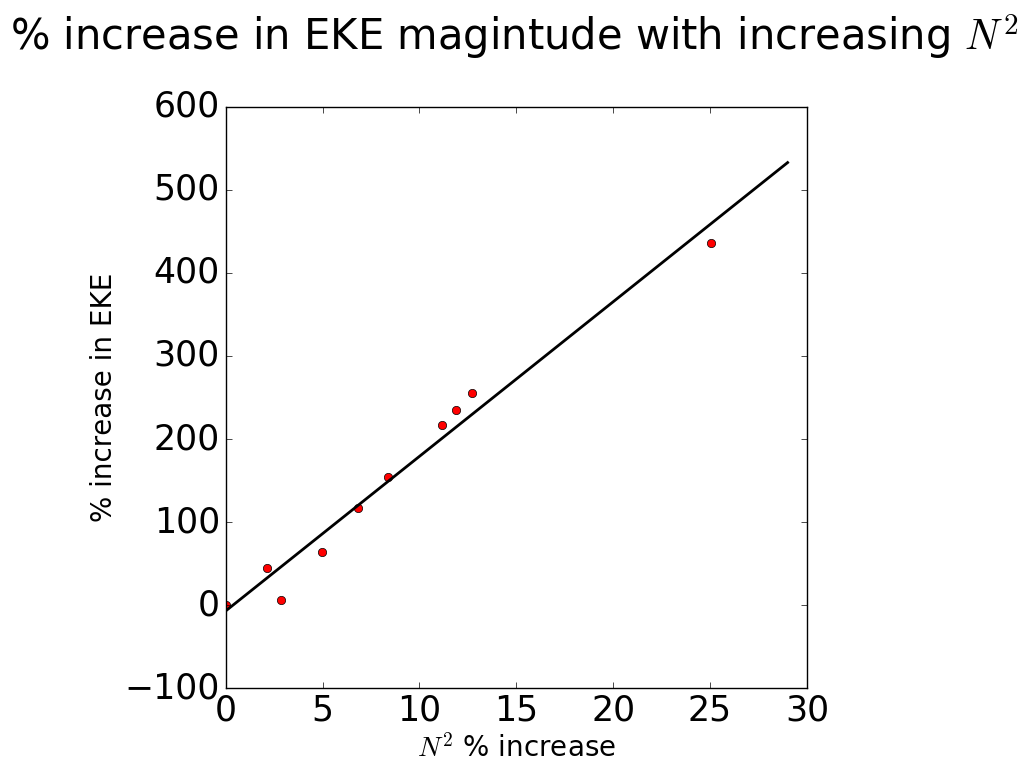

In [334]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(np.array(N2t)*100, EKEt*100,'ro', linewidth=2)
plt.xlabel('$N^2$ % increase', fontsize=20)
plt.ylabel('% increase in EKE', fontsize=20)
plt.title("% increase in EKE magintude with increasing $N^2$ \n",fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
m, c, r, p, ste = linregress(np.array(N2t)*100 ,EKEt*100) 
Y = m*np.arange(0,30,1)+c
q = plt.plot(np.arange(0,30,1), Y,'k', linewidth=2)
plt.xscale('linear')
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)

('m = ', 7.8354417912187753, 'c = ', 0.83727124921460927, 'R = ', 0.91511902127937372, 'P = ', 0.00020477756757367719, 'ste =', 1.2205174325565245)
('m = ', -7.0529061720803217, 'c = ', 18.056336658694946, 'R = ', -0.89160427408580467, 'P = ', 0.00052891573819114669, 'ste =', 1.2664037663515879)
('m = ', -2.998576258628824, 'c = ', 8.1042854287470298, 'R = ', -0.80194865927107228, 'P = ', 0.0052596906846490788, 'ste =', 0.7897390970386845)


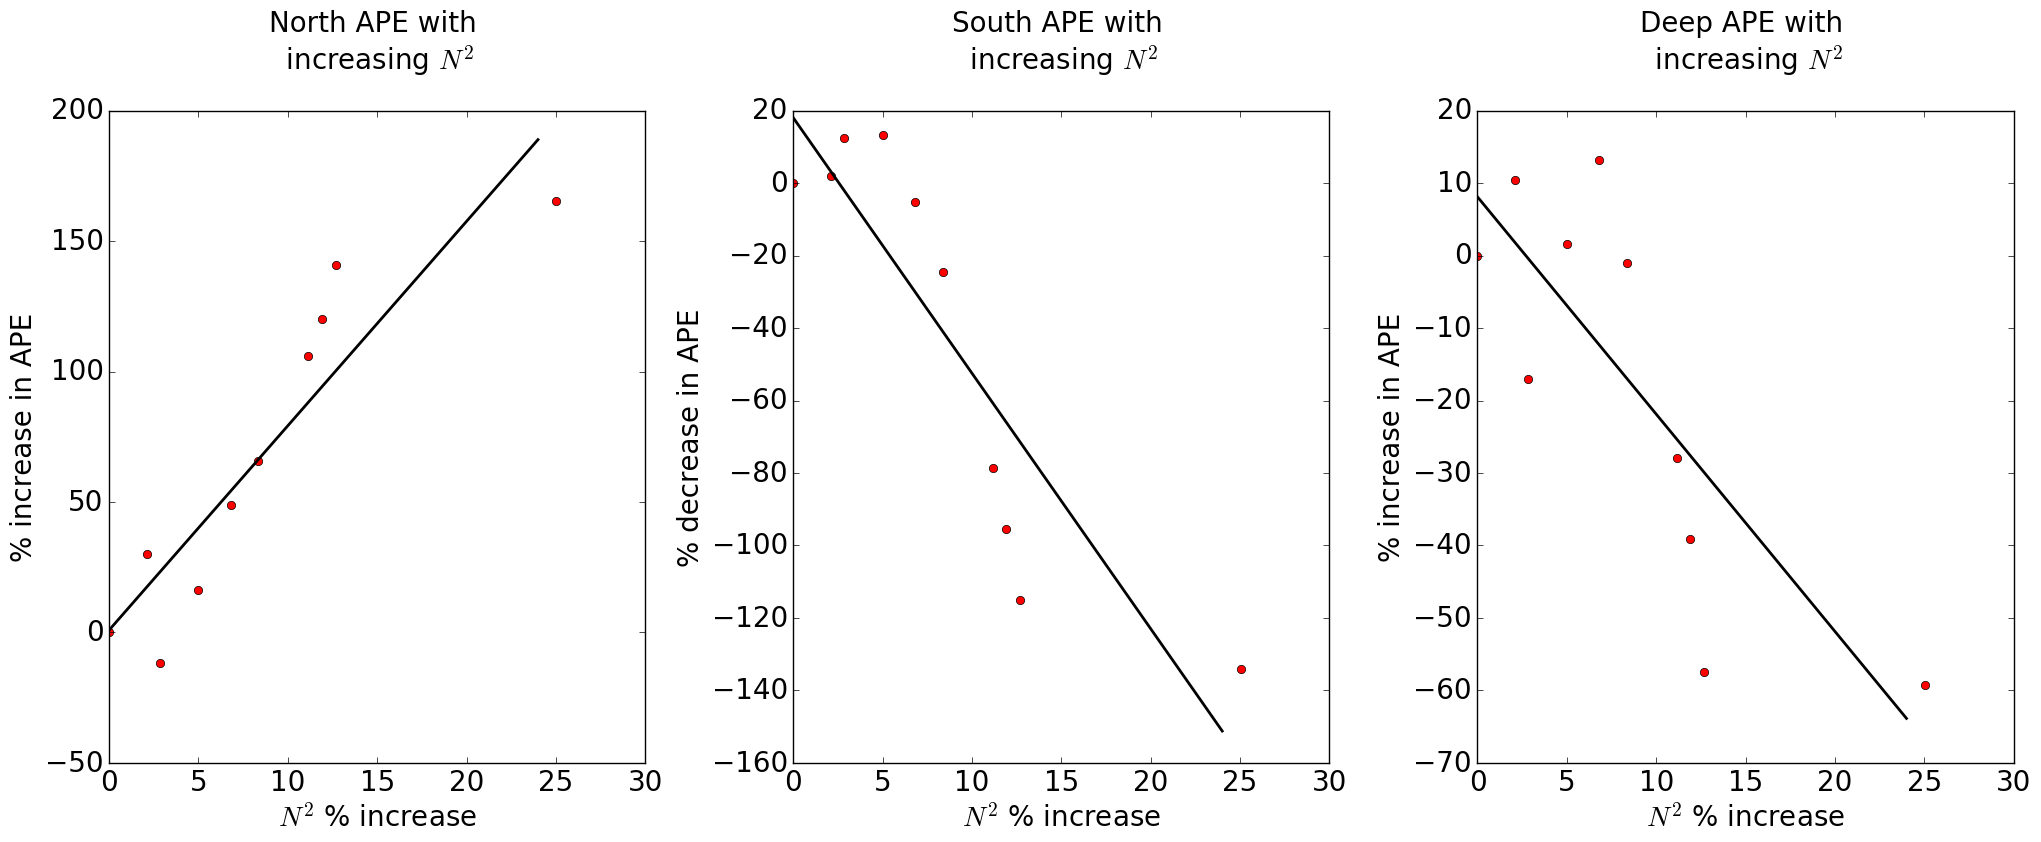

In [363]:
fig=  plt.figure(figsize=(20.5, 8.5))
p = ax = fig.add_subplot(1, 3, 1)
ax.plot(np.array(N2t)*100, APEnt*100,'ro', linewidth=2)
ax.set_xlabel('$N^2$ % increase', fontsize=20)
ax.set_ylabel('% increase in APE', fontsize=20)
ax.set_title("North APE with \n increasing $N^2$ \n",fontsize=20)
m, c, r, p, ste = linregress(np.array(N2t)*100 ,APEnt*100) 
Y = m*np.arange(0,25,1)+c
q = plt.plot(np.arange(0,25,1), Y,'k', linewidth=2)
ax.set_xscale('linear')
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)
ax.tick_params(axis='both', which='major', labelsize=20)
ax2 = fig.add_subplot(1, 3, 2)
q = ax2.plot(np.array(N2t)*100, -APEst*100,'ro', linewidth=2)
ax2.set_xlabel('$N^2$ % increase', fontsize=20)
ax2.set_ylabel('% decrease in APE', fontsize=20)
ax2.set_title("South APE with \n increasing $N^2$ \n",fontsize=20)
m, c, r, p, ste = linregress(np.array(N2t)*100 ,-APEst*100) 
Y = m*np.arange(0,25,1)+c
q = plt.plot(np.arange(0,25,1), Y,'k', linewidth=2)
ax2.set_xscale('linear')
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3 = fig.add_subplot(1, 3, 3)
r = ax3.plot(np.array(N2t)*100, -APEdt*100,'ro', linewidth=2)
ax3.set_xlabel('$N^2$ % increase', fontsize=20)
ax3.set_ylabel('% increase in APE', fontsize=20)
ax3.set_title("Deep APE with \n increasing $N^2$ \n",fontsize=20)
m, c, r, p, ste = linregress(np.array(N2t)*100 ,-APEdt*100) 
Y = m*np.arange(0,25,1)+c
q = plt.plot(np.arange(0,25,1), Y,'k', linewidth=2)
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)
ax3.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

('m = ', 5.363713441050602, 'c = ', 0.3790924681515051, 'R = ', 0.95374763207958646, 'P = ', 1.8932279727713595e-05, 'ste =', 0.59770696872693463)


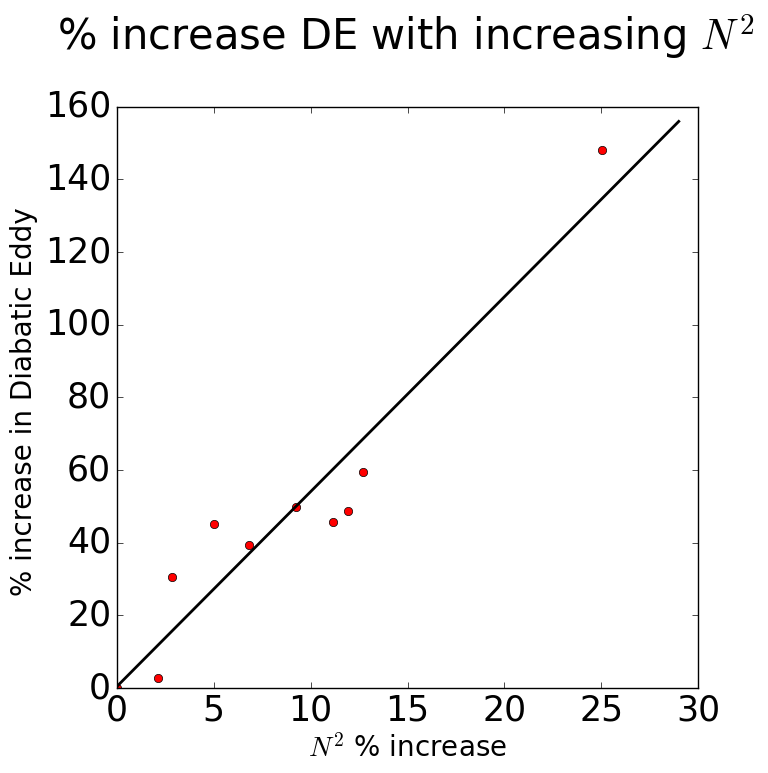

In [198]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
APET = (APEt-np.min(APEt))/np.min(APEt)
ax.plot(np.array(N2t)*100, abs(Dsum)*100,'ro', linewidth=2)
#plt.xscale('log',base=np.e)
plt.xlabel('$N^2$ % increase', fontsize=20)
plt.ylabel('% increase in Diabatic Eddy ', fontsize=20)
plt.title("% increase DE with increasing $N^2$ \n",fontsize=30)
m, c, r, p, ste = linregress(np.array(N2t)*100 ,abs(Dsum)*100) 
Y = m*np.arange(0,30,1)+c
q = plt.plot(np.arange(0,30,1), Y,'k', linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)

# $N^2$  of Northern Boundary #

In [371]:
# Some parameters
tau = ['Vary_N/50m', 'Vary_N/250m', 'Vary_N/500m','Vary_N/750m','Vary_N/1000m',
       'Vary_N/2000m', 'Vary_N/3000m', 'Vary_N/10000m', 'Vary_N/16CDT' , 'Vary_N/4CDT' ]
Figletter = ['a) ', 'b) ', 'c) ', 'd) ', 'e) ', 'f) ', 'g) ', 'h) ', 'j) ']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/VSQ.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs = np.array(runs)
# Loop through runs
ROCt = []
N2t = []
N2nt = []
EKEt = []
APEt = []
APEdt = []
APEst = []
APEnt = []
Dsum = []
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]])+'/'
    c = utils.ChannelSetup(output_dir=str(fname))
    CellVol = c.rac*np.tile(c.dzf,(c.Nx,c.Ny,1)).T
    # load V, W, T bar    
    # put everything on the C Grid                        
    VT = (c.mnc('Tav_VT.nc','VVELTH'))
    WT = (c.mnc('Tav_VT.nc','WVELTH'))
    Tv = utils.cgrid_to_vgrid(c.mnc('Tav.nc','THETA'))
    Tw = utils.cgrid_to_wgrid(c.mnc('Tav.nc','THETA'))
    V = (c.mnc('Tav.nc','VVEL'))
    W = (c.mnc('Tav.nc','WVEL'))
    npad = ((0, 1), (0, 0), (0, 0))
    W = np.pad(W, pad_width=npad, mode='constant', constant_values=0)
    WT = np.pad(WT, pad_width=npad, mode='constant', constant_values=0)

    Ty = (Tv[:,0:-1,:] - Tv[:,1::,:])*CellVol
    Tz = (Tw[1::,:,:] - Tw[0:-1,:,:])*CellVol
 
    g = layers_calc_numba.LayersComputer(c)
    # ROC 
    psiz = c.get_psi_iso_z()
    dPz = c.ddz_cgrid_centered(psiz*Ty.mean(axis=2)/5000)
    dPy = c.ddy_cgrid_centered(psiz*Tz.mean(axis=2)/5000)
    ROC = np.sum((dPz+dPy),axis=0)/np.sum(CellVol.mean(axis=2)/5000)
    
    # Diabatic eddis from new def
    dx = 5000
    nx = 200
    Dz = (dx*((WT[1::, :, :]-WT[0:-1, :, :])*CellVol).mean(axis=2)/nx -
             c.ddz_cgrid_centered(psiz*Ty.mean(axis=2)/5000))
    Dy = (dx*((VT[:, 1::, :]-VT[:, 0:-1, :])*CellVol).mean(axis=2)/nx -
             c.ddy_cgrid_centered(psiz*Tz.mean(axis=2)/5000))
    D = np.sum((abs(Dz+Dy)), axis=0)/np.sum(CellVol.mean(axis=2))
    
    CellVol = 5000*np.tile(c.dzf,(c.Ny,1)).T
    # Layers package variables
    Psi = c.get_psi_iso_z()/10**6
    EKE = c.calc_EKE()*CellVol
    g = AC.APEcomputer(c)
    APE = g.calc_APE_3d().mean(axis=2)
    APEpos = APE
    APEneg[APEpos<0] = np.nan
    APED = (np.nansum((APEpos[28::,-25::])))
    APEN = (np.nansum((APEpos[0:28,-150::])))
    APEneg = APE
    APEneg[APEneg>0] = np.nan
    APES = np.nanmean(APEneg[12:25,0:50]) #(np.sum(((APEneg[12:28,0:150]))))
    # Make list of ROC / ROC0
    if i == 0:
        ROC0 = np.sum(abs(Psi))
        EKE0 = np.sum(abs(EKE))/(3000*c.Ly)
        APE0 = np.sum(abs(APE.mean(axis=1)))
        APES0 =  abs(APES)
        APEN0 =  APEN
        APED0 =  APED
        D0 = np.sum(abs(D))
    ROCt.append((np.sum(abs(Psi))-ROC0)/ROC0)
    EKEt.append(((np.sum(abs(EKE)))/(3000*c.Ly)-EKE0)/EKE0)
    APEt.append((np.sum(abs(APE.mean(axis=1)))-APE0)/APE0)
    APEst.append((abs(APES)-abs(APES0))/APES0)
    APEnt.append((APEN-APEN0)/APEN0)
    APEdt.append((APED-APED0)/APED0)
    Dsum.append((np.sum(abs(D))-D0)/D0)
    N2 = c.get_N2()
    if i == 0:
        N20 = np.sum(abs(N2*CellVol)[:,-25::])/(3000*c.Ly)
        N2n0 = np.sum(abs(N2*CellVol))/(3000*c.Ly)
    N2t.append(((np.sum(abs(N2*CellVol)))/(3000*c.Ly)-N20)/N20)
    N2nt.append(((np.sum(abs(N2*CellVol)[:,-25::]))/(3000*c.Ly)-N20)/N20)
Dsum = np.array(Dsum)
EKEt = np.array(EKEt)
N2 = np.array(N2t)
N2n = np.array(N2nt)
APEt = np.array(APEt)
APEst = np.array(APEst)
APEnt = np.array(APEnt)
APEdt = np.array(APEct)
ROC = np.array(ROC)

('m = ', 35.328064096563814, 'c = ', 18.812061044997861, 'R = ', 0.97882236954319257, 'P = ', 8.5784273794586474e-07, 'ste =', 2.6122398397514721)


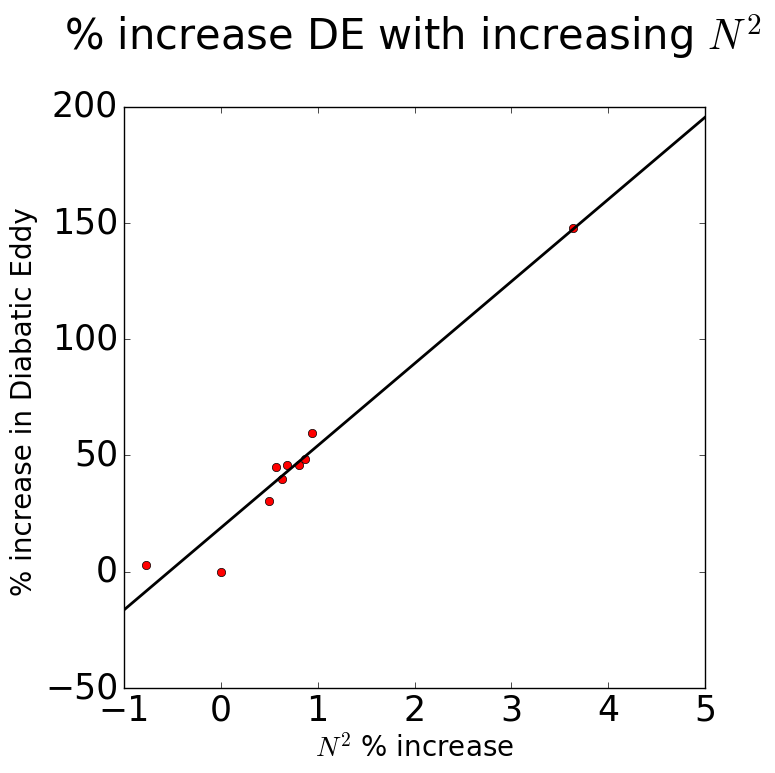

In [373]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
APET = (APEt-np.min(APEt))/np.min(APEt)
ax.plot(np.array(N2nt)*100, abs(Dsum)*100,'ro', linewidth=2)
#plt.xscale('log',base=np.e)
plt.xlabel('$N^2$ % increase', fontsize=20)
plt.ylabel('% increase in Diabatic Eddy ', fontsize=20)
plt.title("% increase DE with increasing $N^2$ \n",fontsize=30)
m, c, r, p, ste = linregress(np.array(N2nt)*100 ,abs(Dsum)*100) 
Y = m*np.arange(-1,6,1)+c
q = plt.plot(np.arange(-1,6,1), Y,'k', linewidth=2)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
print('m = ', m, 'c = ', c, 'R = ', r , 'P = ', p , 'ste =', ste)